# Analisis Prediktif: Prediksi Data Churn Pelanggan Telekomunikasi
---
Oleh : Sylla Ayu Kusumahati
Proyek Submission 1 - Machine Learning Terapan Dicoding


## Pendahuluan
Pada proyek ini, topik yang dibahas adalah mengenai telekomunikasi yang dibuat untuk memprediksi data churn pelanggan telekomunikasi. Proyek ini dibuat untuk proyek Submission 1 - Machine Learning Terapan Dicoding. Untuk memudahkan navigasi di halaman, silahkan gunakan menu Table of Contents di kiri atas halaman. 

# Pertama, import library yang dibutuhkan

In [ ]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

# Untuk pembuatan model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error


# Kedua, Mempersiapkan Dataset

## 2.1 Menyiapkan kredensial akun Kaggle

In [ ]:
# install paket kaggle
!pip install -q kaggle

In [ ]:
# Upload file kaggle.json, didapat dengan cara:
# Buka pengaturan akun kaggle.com, lalu Create New API Token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syllahati","key":"35222f150333b89fe0d6cfffdb49f786"}'}

In [ ]:
# Membuat folder .kaggle di dalam folder root
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke folder .kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

## 2.2 Mengunduh dan Menyiapkan Dataset

In [ ]:
# download datasets kaggle menggunakan API command
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Mengekstrak berkas zip ke direktori aktif saat ini
!unzip /content/telco-customer-churn.zip

Archive:  /content/telco-customer-churn.zip
replace WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Ketiga, Pemahaman Data (*Data Understanding*)

## 3.1 Load data pada sebuah Dataframe menggunakan pandas

In [ ]:
# load the datasets
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 3.2 Informasi mengenai kolom pada dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 3.3 Visualisasi Data

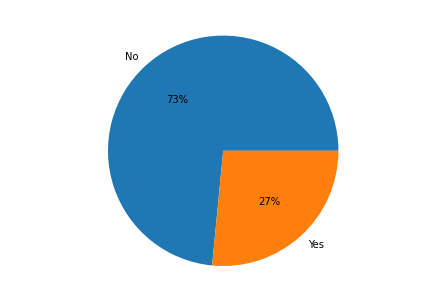

In [ ]:
#Memvisualisasikan Presentasi Churn
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No', 'Yes']
churn = data.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

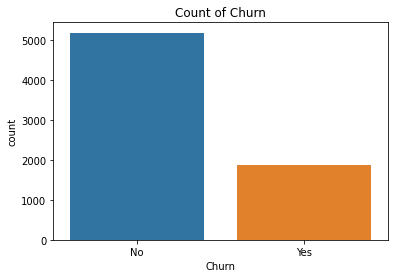

In [ ]:
# Plotting dengan fitur target
sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

### 3.3.1 Visualisasi data yang kosong

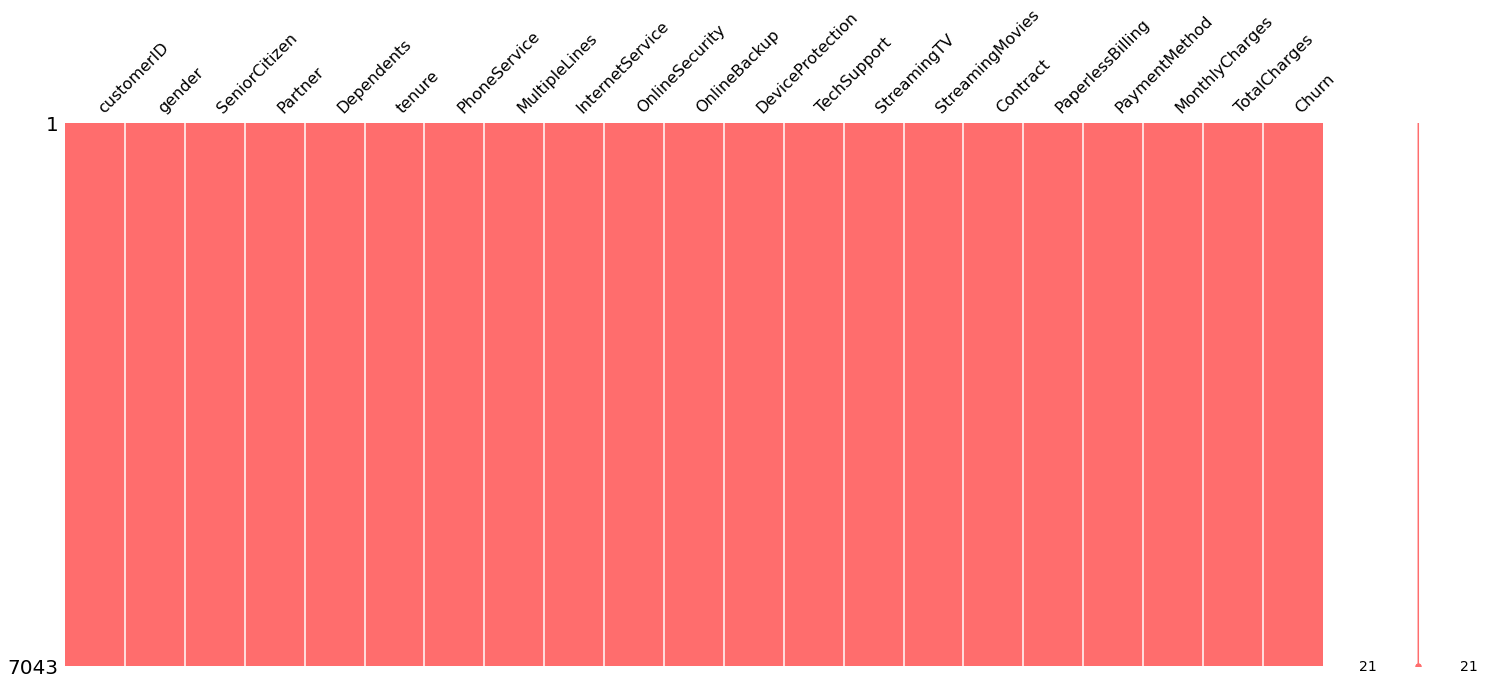

In [ ]:
# Memvisualisasi data yang kosong
sorted_null = msno.nullity_sort(data, sort='descending') 
figures = msno.matrix(sorted_null, color=(1, 0.43, 0.43))

### 3.3.2 Membagi Dataset menjadi Fitur numerik dan fitur kategori

In [ ]:
# Total charges ada di objek dtype jadi ubah menjadi fitur Numerik 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
# numerical feature
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'SeniorCitizen', 'tenure', 'TotalCharges', 'MonthlyCharges'}


In [ ]:
# Categorical feature
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 17
Categorical feature are:
 {'customerID', 'StreamingMovies', 'Contract', 'DeviceProtection', 'gender', 'MultipleLines', 'OnlineSecurity', 'TechSupport', 'PaymentMethod', 'PhoneService', 'Partner', 'InternetService', 'Dependents', 'Churn', 'StreamingTV', 'PaperlessBilling', 'OnlineBackup'}


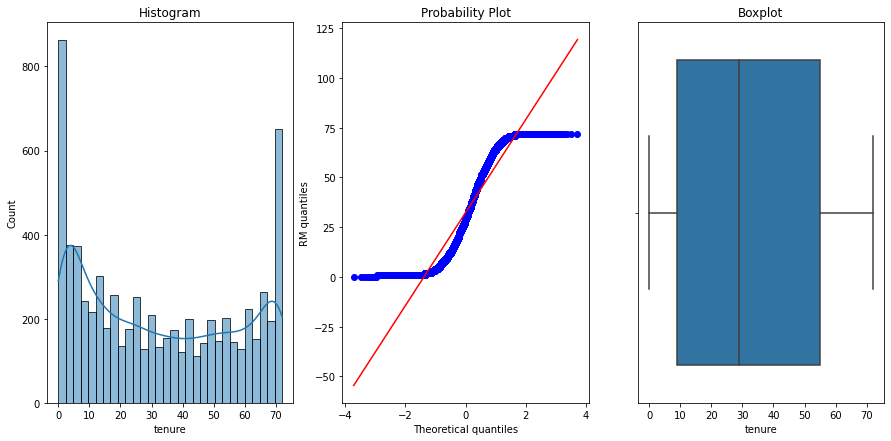

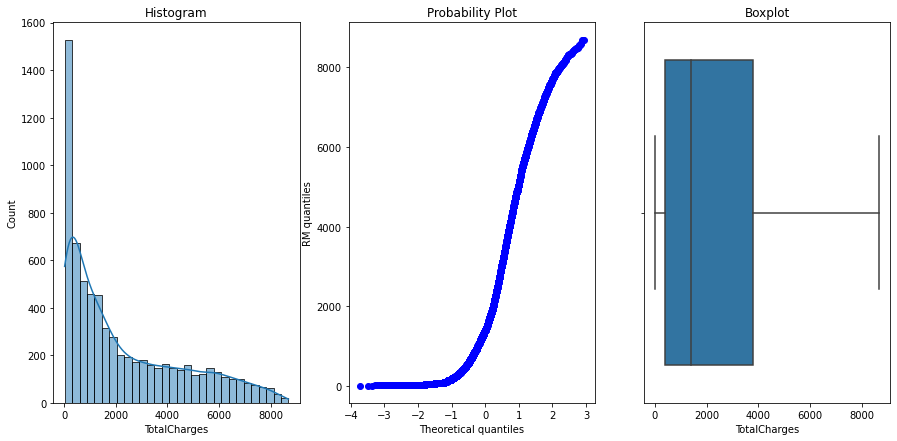

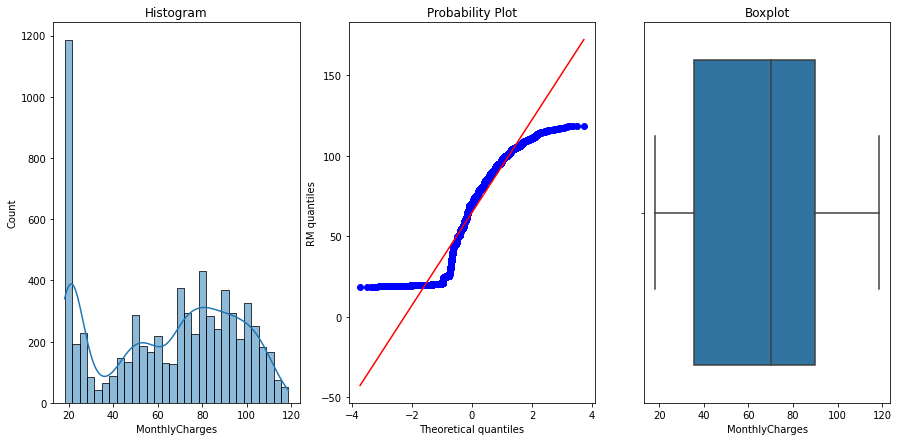

In [ ]:
# Plotting fitur numerik dengan distribusi probabilitas dan memeriksa outlier
for feature in numerical_feature:
    if feature != 'SeniorCitizen':
        plt.figure(figsize=(15,7))
    
        plt.subplot(1, 3, 1)
        sns.histplot(data=data, x=feature, bins=30, kde=True)
        plt.title('Histogram')
    
        plt.subplot(1, 3, 2)
        stats.probplot(data[feature], dist="norm", plot=plt)
        plt.ylabel('RM quantiles')
    
        plt.subplot(1, 3, 3)
        sns.boxplot(x=data[feature])
        plt.title('Boxplot')
    
plt.show()

### 3.3.3 Distribusi data pada kolom dengan fitur numerik ('MonthlyCharges', 'SeniorCitizen', 'tenure')

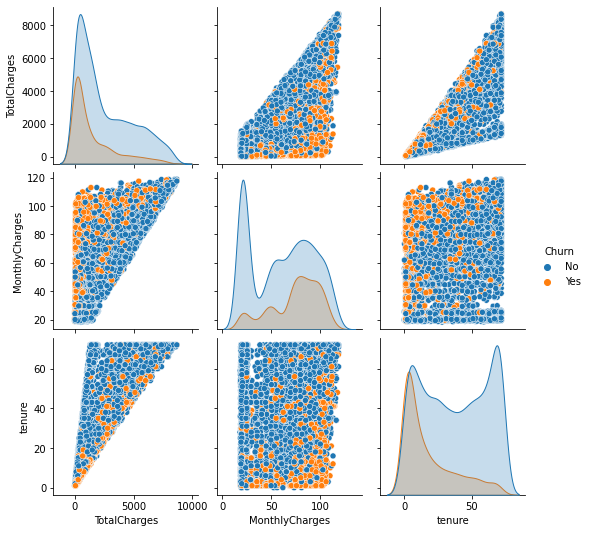

In [ ]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data,vars = ['TotalCharges','MonthlyCharges','tenure'], hue="Churn")

### 3.3.4 Distribusi kelas pada kolom dengan fitur kategori

<Figure size 432x288 with 0 Axes>

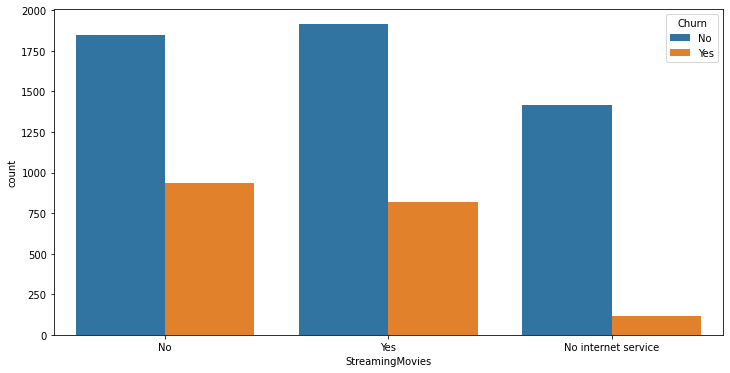

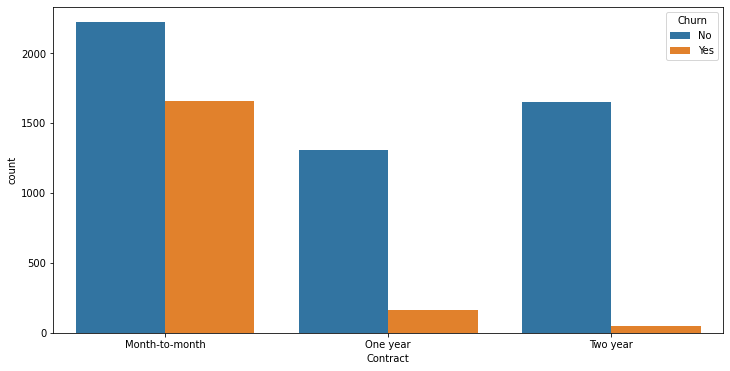

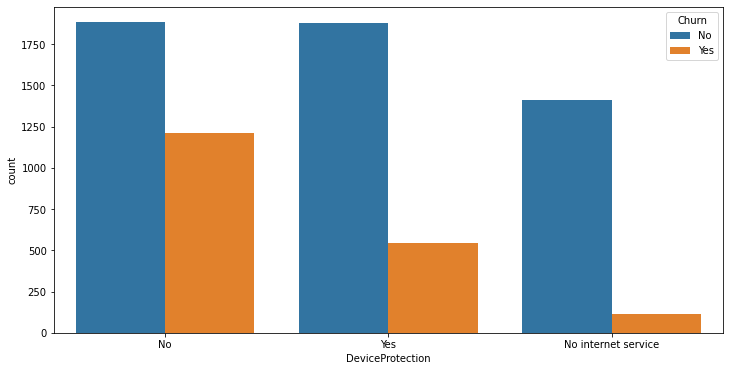

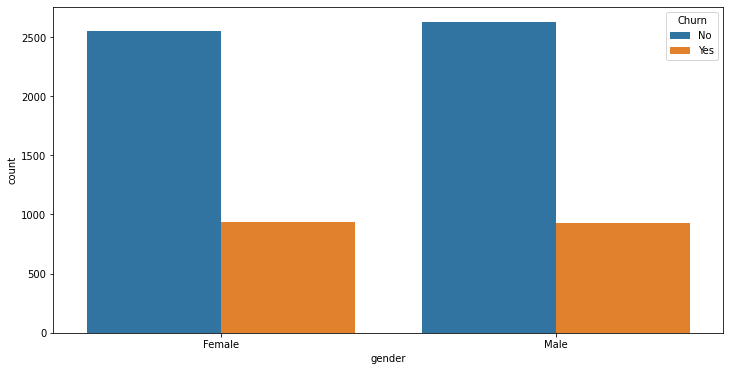

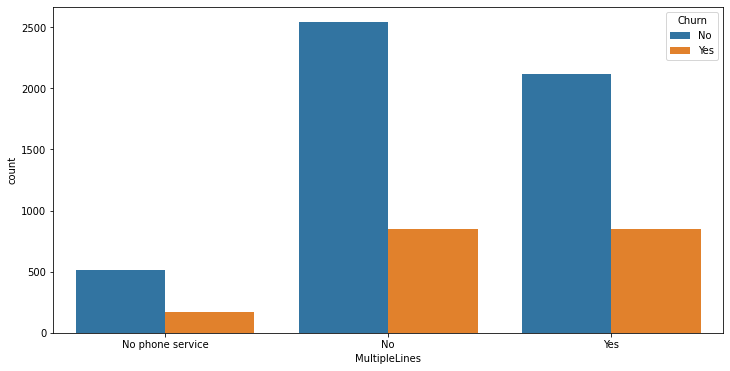

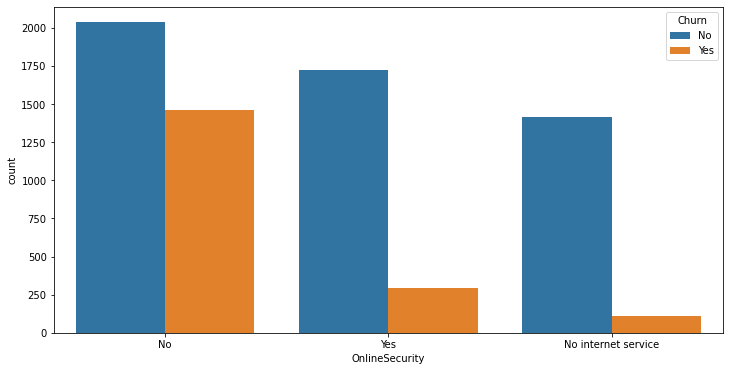

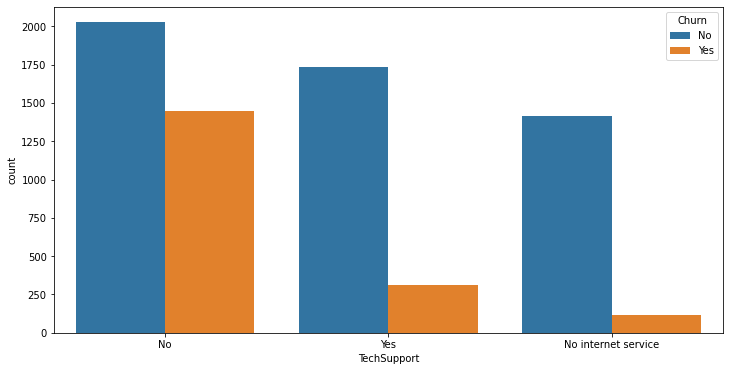

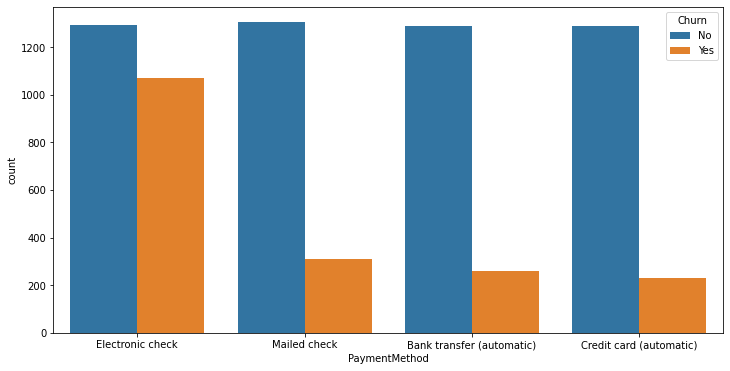

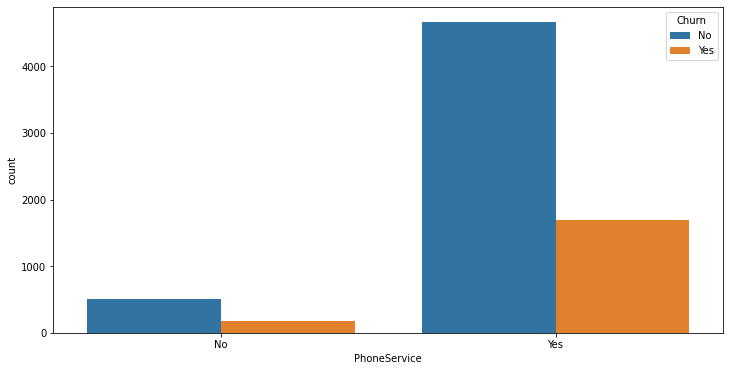

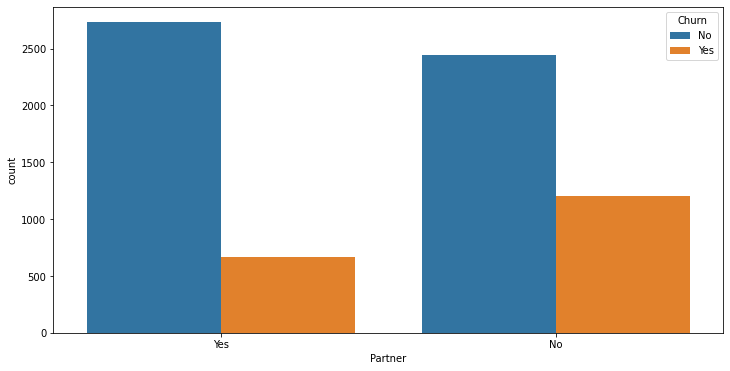

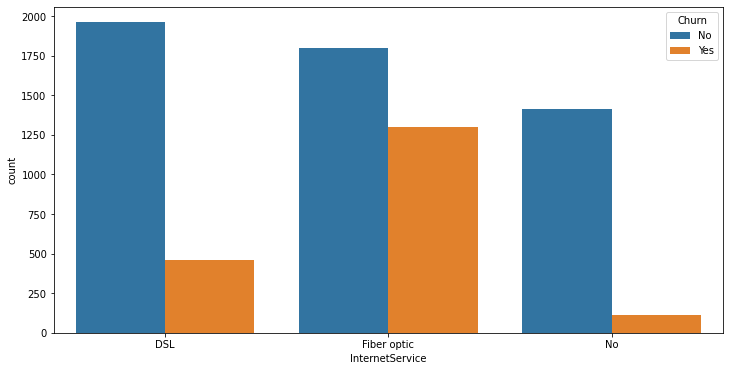

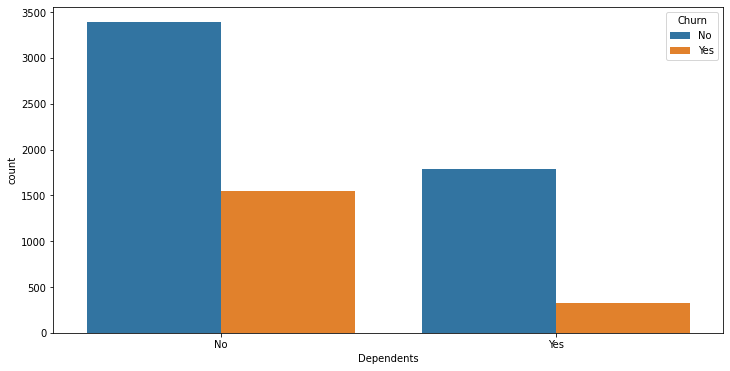

<Figure size 432x288 with 0 Axes>

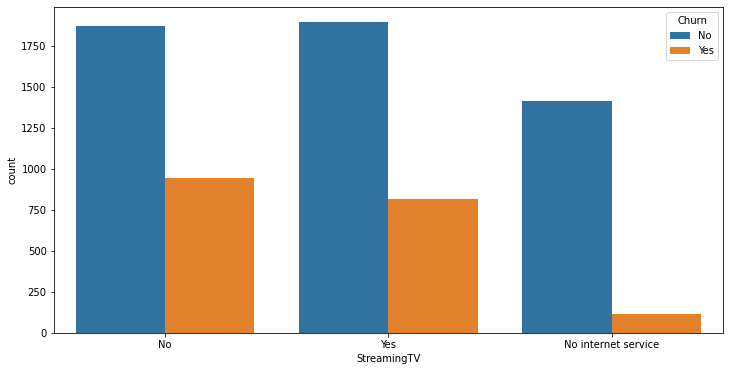

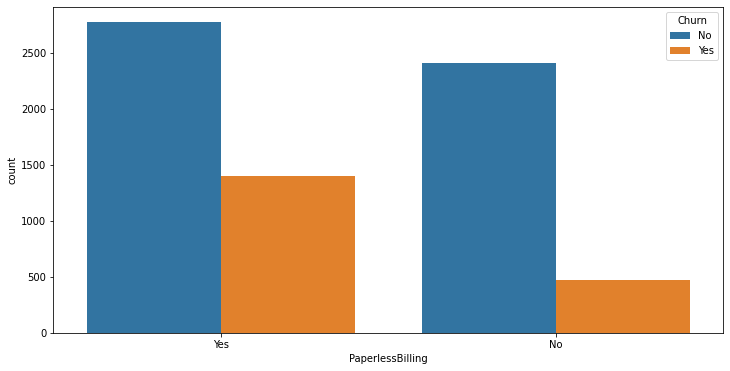

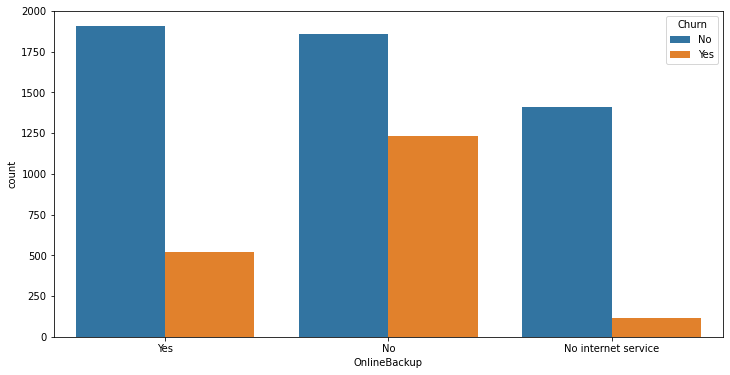

In [ ]:
#Exploratory Data Analysis (EDA) Variabel Katagorik
for i, feature in enumerate(categorical_feature):
    if feature != 'Churn':
        if feature != 'customerID':
            plt.figure(i)
            plt.figure(figsize=(12,6))
            sns.countplot(data=data, x=feature, hue='Churn')
plt.show()

### 3.3.5 Korelasi data antar kolom dengan fitur numerik

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

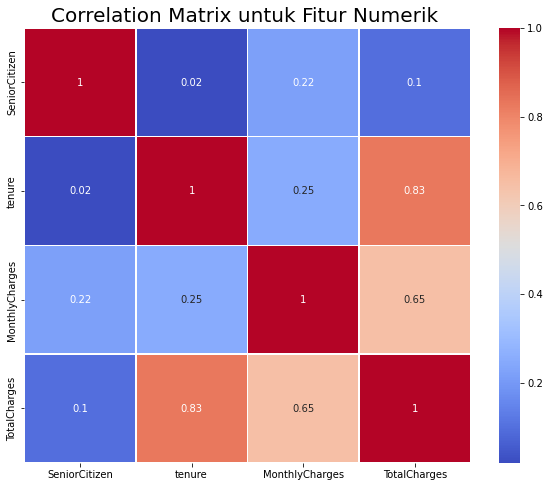

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Keempat, Persiapan Data (Data Preparation)

## 4.1 Mengatasi masalah data yang kosong dengan nilai rata-rata kolom (mean substitution)

In [ ]:
# Mengecek kembali nilai yang kosong pada dataset
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# ganti nilai NaN dengan nilai rata-rata
data.TotalCharges = data.TotalCharges.fillna(data.TotalCharges.mean())

In [ ]:
# Mengecek total baris dan kolom dari dataset
data.shape

(7043, 21)

## 4.2 Encoding Fitur Kategori

In [ ]:
#Encoding Data
encoder = LabelEncoder()
for feature in categorical_feature:
    data[feature] = encoder.fit_transform(data[feature])

In [ ]:
# Menghapus kolom customerID
data.drop(columns=['customerID'], inplace=True)

## 4.3 Melakukan pembagian data pada dataset dengan train_test_split

In [ ]:
# splitting dataset
X = data.drop(columns='Churn')
y = data['Churn']

# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengecek jumlah baris pada data latih dan data 
print('Jumlah baris dan kolom X_train adalah:', X_train.shape, ', sedangkan jumlah baris dan kolom y_train adalah:', y_train.shape)
print('Presentase Churn di data training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom X_test adalah:', X_test.shape, ', sedangkan jumlah baris dan kolom y_test adalah:', y_test.shape)
print('Presentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom X_train adalah: (5634, 19) , sedangkan jumlah baris dan kolom y_train adalah: (5634,)
Presentase Churn di data training adalah:
0    0.734469
1    0.265531
Name: Churn, dtype: float64
Jumlah baris dan kolom X_test adalah: (1409, 19) , sedangkan jumlah baris dan kolom y_test adalah: (1409,)
Presentase Churn di data Testing adalah:
0    0.735273
1    0.264727
Name: Churn, dtype: float64


## 4.3 Standarisasi nilai data pada fitur numerik dengan StandardScaler

In [ ]:
# menggunakan metode StandardScaler 
numerical_features = ['TotalCharges', 'MonthlyCharges', 'tenure', 'SeniorCitizen']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,TotalCharges,MonthlyCharges,tenure,SeniorCitizen
2142,-0.422099,-0.000474,-0.465683,-0.437749
1623,1.255366,1.074754,0.885537,-0.437749
6074,-1.002985,-1.376499,-1.284605,-0.437749
1362,-0.908113,0.177346,-1.161766,-0.437749
6754,-0.003468,-0.098524,-1.325551,-0.437749


In [ ]:
# Deskripsi 
X_train[numerical_features].describe().round(4)

,TotalCharges,MonthlyCharges,tenure,SeniorCitizen
count,5634.0000,5634.0000,5634.0000,5634.0000
mean,-0.0000,-0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001
min,-1.0050,-1.5493,-1.3256,-0.4377
25%,-0.8310,-0.9677,-0.9570,-0.4377
50%,-0.3885,0.1881,-0.1381,-0.4377
75%,0.6703,0.8334,0.9265,-0.4377
max,2.8279,1.7860,1.6226,2.2844


In [ ]:
# Mengecek jumlah baris pada data latih dan data 
print(X_train.shape)
print(X_test.shape)

(5634, 19)
(1409, 19)


# Kelima, Pembuatan Model

## 5.1 Melatih dengan beberapa model yang terbaik untuk dijadikan Model Baseline

In [ ]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RN', 'Boosting'])

In [ ]:
# Melatih data dengan KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

In [ ]:
# Melatih data dengan Random Forests
rf = RandomForestClassifier(n_estimators=10, max_depth=16, random_state=15, n_jobs=-1)
rf.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)

In [ ]:
# Melatih data dengan AdaBoost
boosting = AdaBoostClassifier(n_estimators=10, learning_rate=0.01, random_state=15)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [ ]:
# Proses scaling terhadap data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
# evaluasi ketiga model kita dengan metrik MSE
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,0.000193291,0.000217175
RF,2.62691e-05,0.000207949
Boosting,0.000265531,0.000264727


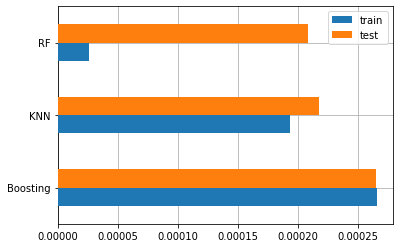

In [ ]:
# Plot metrik dengan bar chart
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
# Prediksi menggunakan beberapa harga dari data test
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
185,1,1,1,0


## 5.2 Model Baseline dengan Algoritma K-Nearest Neighbors

In [ ]:
# Pembuatan model baseline
baseline_model = KNeighborsClassifier()
baseline_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Pengujian model terhadap data test
y_pred = baseline_model.predict(X_test)

In [ ]:
# Laporan hasil klasifikasi model baseline
baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['Not Churn','Churn'])
pd.DataFrame(baseline_report).transpose()

,precision,recall,f1-score,support
Not Churn,0.825162,0.861004,0.842702,1036.000000
Churn,0.560976,0.493298,0.524964,373.000000
accuracy,0.763662,0.763662,0.763662,0.763662
macro avg,0.693069,0.677151,0.683833,1409.000000
weighted avg,0.755225,0.763662,0.758588,1409.000000


In [ ]:
# Menyimpan hasil prediksi untuk confussion matrix
baseline_cf = confusion_matrix(y_test, y_pred)

## Pengembangan Model K-Nearest Neighbors dengan Hyper Parameter Tuning menggunakan GridSearchCV

In [ ]:
# Hyperparameter yang akan di tuning
param_grid = {'n_neighbors': [1, 2],
              'p': [1, 2],
              'weights': ["uniform","distance"],
              'algorithm':["ball_tree", "kd_tree", "brute"],
              }

In [ ]:
# Pencarian parameter terbaik dengan GridSearchCV
clf = GridSearchCV(baseline_model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
# Hasil hyperparameter tuning
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   11.2s finished


In [ ]:
# Hasil hyperparameter tuning
best_clf.best_estimator_ 

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
 # Hasil hyperparameter tuning
 best_clf.best_score_

0.7550585729499467

In [ ]:
# Penerapan hyperparameter pada model baseline
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
# Pengujian model terhadap data test
y_pred = model.predict(X_test)

In [ ]:
# Laporan hasil klasifikasi model baseline
improvement_report = classification_report(y_test, y_pred, output_dict=True, target_names=['Not Churn','Churn'])
pd.DataFrame(improvement_report).transpose()

,precision,recall,f1-score,support
Not Churn,0.791632,0.931467,0.855876,1036.00000
Churn,0.626316,0.319035,0.422735,373.00000
accuracy,0.769340,0.769340,0.769340,0.76934
macro avg,0.708974,0.625251,0.639306,1409.00000
weighted avg,0.747869,0.769340,0.741212,1409.00000


In [ ]:
# Menyimpan hasil prediksi untuk confussion matrix
improvement_cf = confusion_matrix(y_test, y_pred)

# Keenam, Evaluasi Model

## 6.1 Perbandingan metriks antara model baseline dengan model yang dikembangkan

In [ ]:

# Memasukkan hasil laporan klasifikasi model pada dataframe
metrics = pd.DataFrame({'accuracy' : [baseline_report['accuracy'], improvement_report['accuracy']],
                        'f1-score_0' : [baseline_report['Not Churn']['f1-score'],improvement_report['Not Churn']['f1-score']],
                        'precision_0' : [baseline_report['Not Churn']['precision'],improvement_report['Not Churn']['precision']],
                        'recall_0' : [baseline_report['Not Churn']['recall'],improvement_report['Not Churn']['recall']],
                        'f1-score_1' : [baseline_report['Churn']['f1-score'],improvement_report['Churn']['f1-score']],
                        'precision_1' : [baseline_report['Churn']['precision'],improvement_report['Churn']['precision']],
                        'recall_1' : [baseline_report['Churn']['recall'],improvement_report['Churn']['recall']]},
                        index=['Model Baseline','Model yang Dikembangkan'])
multiheader = [('','accuracy'),
               ('Not Churn', 'f1-score'),
               ('Not Churn', 'precision'),
               ('Not Churn', 'recall'),
               ('Churn', 'f1-score'),
               ('Churn', 'precision'),
               ('Churn', 'recall')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
# Menampilkan dataframe
metrics

Not Churn  ...     Churn          
                         accuracy  f1-score  ... precision    recall
Model Baseline           0.763662  0.842702  ...  0.560976  0.493298
Model yang Dikembangkan  0.769340  0.855876  ...  0.626316  0.319035

[2 rows x 7 columns]

## 6.2 Confussion Matrix

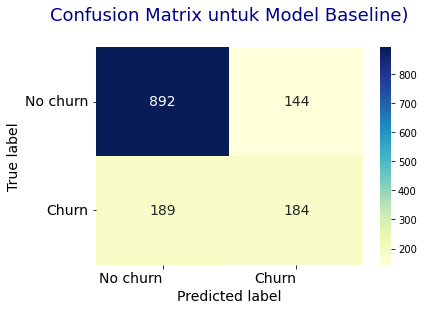

In [ ]:
# Visualisasi hasil prediksi model baseline
figures = pd.DataFrame(baseline_cf, ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(figures, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix untuk Model Baseline)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

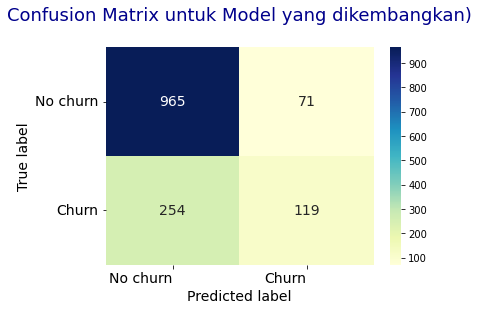

In [ ]:
# Visualisasi hasil prediksi model yang dikembangkan
figures = pd.DataFrame(improvement_cf, ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(figures, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix untuk Model yang dikembangkan)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Penutupan

Akhirnya kita telah sampai pada tahap akhir dalam memprediksi churn pelanggan telekomunikasi ini. Pemilihan algoritma dari perbandingan diatas jatuh kepada K-Nearest Neighbors. Karena dari hasil perbandingan K-Nearest Neighbors lah yang memiliki keseimbangan nilai error, ditunjukkan pada plot matrix. Setelah itu penerapan Hyperparameter pada model baseline menggunakan GridSearchCV. Dengan penerapan ini akurasi menjadi meningkat, walaupun pada precision, f1-score dan recall mengalami sedikit penurunan. Namun, akurasi sudah terlihat baik.

## Referensi :


*   Dokumentasi Scikit-learn : https://scikit-learn.org/stable/modules/classes.html
*   Dokumentasi Plotly : https://plotly.com/python/
*   Dokumentasi Hyperparameter : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
Lainnya :

    *   https://www.kaggle.com/ahalaa/churn-model-using-random-forest-vsm-and-ann#Applying-ML-Models
    *   https://www.kaggle.com/puisingwong/machine-learning-in-customer-churn-prediction
    *   https://www.kaggle.com/ozdemirh/customer-churn-prediction-with-knn-classifier#Standardization
  





